<a href="https://colab.research.google.com/github/viola2002/2025_DeepLearning_for_AI/blob/main/0320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # train과 test로 분리

In [2]:
# ?를 덧붙여 도움말 실행
mnist.load_data?

In [3]:
# train 이미지 데이터 차원 출력
train_images.shape

(60000, 28, 28)

In [4]:
# train 이미지 데이터 label 개수
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# test 이미지 데이터 차원 출력
test_images.shape

(10000, 28, 28)

In [7]:
# 첫번째 이미지의 벡터
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [8]:
# 첫번째 이미지의 벡터
# show data 클릭 -> 28*28 pixel data
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [9]:
# test 이미지 데이터 label 개수
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"), # 1st dense layer
    layers.Dense(10, activation="softmax") # 2nd dense layer # 0~9
])

- `keras.Sequential()`
  - [TensorFlow/Model/with_the_sequential_class](https://www.tensorflow.org/api_docs/python/tf/keras/Model#with_the_sequential_class)
- `layers`
  - `Dense()`(fully connected), `Conv2D()`(onvolutional), `LSTM()`, etc.



**The compilation step**

In [12]:
model.compile(optimizer="rmsprop", # 최적화 기법 # rmsprop: RMS(Root Mean Square) 이용
              loss="sparse_categorical_crossentropy", # 손실 함수 # sparse_categorical_crossentropy: 희소 범주형 교차 엔트로피
              metrics=["accuracy"]) # 모델의 평가 지표

- `model.compile()`
  - [TensorFlow/Model/compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)
- `optimizer`
  - "rmsprop", "SGD"(Stochastic Gradient Descent), etc.
  - [TensorFlow/optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
- `loss` (function)
  - "sparse_categorical_crossentropy", etc.
  - [TensorFlow/losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
- `metrics`
  - [TenserFlow/metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

**Preparing the image data**

In [13]:
# each pixel's value ranges from 0 to 255 (i.e., 256 possible values)
# so we divide by 255 to normalize the pixel values to the range [0, 1]
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8729 - loss: 0.4389
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1160
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9785 - loss: 0.0732
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0378


- [TensorFlow/Model/fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)
  - epochs
    - Number of epochs to train the model
    - An epoch is an iteration over the entire x and y data provided
    - = 모델이 훈련 데이터셋을 반복해서 학습할 횟수
  - batch_size
    - Number of samples per gradient update
    - = 모델이 한 번의 학습에서 처리할 훈련 데이터의 샘플 수

**Using the model to make predictions**

In [15]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


array([2.1966116e-07, 8.9264640e-09, 6.7470737e-06, 5.1698793e-05,
       1.0198747e-10, 1.9905690e-07, 2.4464389e-11, 9.9993992e-01,
       2.6101733e-07, 9.7478198e-07], dtype=float32)

In [16]:
predictions[0].argmax() # argmax(): 가장 큰 값의 인덱스를 반환하는 함수 -> 가장 높은 확률을 가진 클래스의 인덱스 반환

np.int64(7)

In [17]:
predictions[0][7]

np.float32(0.9999399)

In [18]:
test_labels[0]

np.uint8(7)

✅ `predictions`와 `test_labels`를 비교해보니 일치함

In [19]:
# 가중치 비교
print(len(model.weights))
print()
print(model.weights[0])

4

<Variable path=sequential/dense/kernel, shape=(784, 512), dtype=float32, value=[[-0.0388724   0.03989542  0.02199894 ...  0.03977191  0.00432776
   0.02924845]
 [ 0.05256087  0.0152437  -0.05661645 ...  0.03649601  0.05718294
   0.01645888]
 [ 0.02476799 -0.06164347  0.01105776 ...  0.06395976  0.02474947
  -0.03618941]
 ...
 [ 0.00473872  0.00412759  0.0474704  ... -0.0643976   0.01076498
   0.05786359]
 [-0.02373781 -0.0231631   0.05848829 ...  0.02720951 -0.04483289
  -0.02325505]
 [ 0.05419935 -0.04996667 -0.0479296  ... -0.0313643   0.00050589
   0.01524273]]>


**Evaluating the model on new data**

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0854
test_acc: 0.977400004863739


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [21]:
import numpy as np
x = np.array(12)
x

array(12)

In [22]:
x.ndim

0

### Vectors (rank-1 tensors)

In [23]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [24]:
x.ndim

1

### Matrices (rank-2 tensors)

In [25]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [26]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [27]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
train_images.ndim

3

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

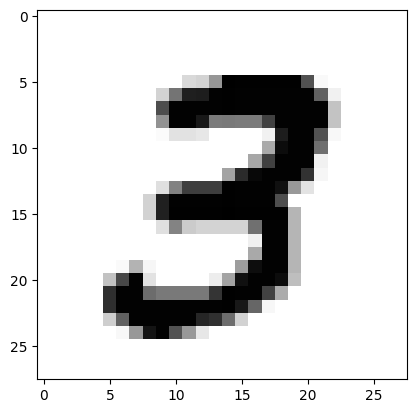

In [31]:
import matplotlib.pyplot as plt
digit = train_images[7]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

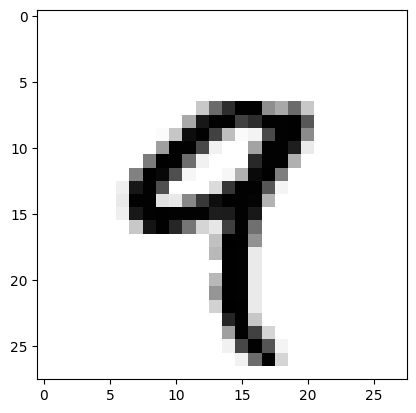

In [32]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

colab의 AI 코드 생성을 이용하면 편리함. 단, 시험에서는 금지됨.

In [33]:
train_labels[4]

np.uint8(9)

### Manipulating tensors in NumPy

In [34]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[:, 14:, 14:]

print(my_slice.shape)

(60000, 14, 14)


In [38]:
my_slice = train_images[:, 7:-7, 7:-7]

print(my_slice.shape)

(60000, 14, 14)


### The notion of data batches

In [39]:
batch = train_images[:128]

In [40]:
batch = train_images[128:256]

In [41]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

🔼**2025.03.13**


🔽**2025.03.20**

### Element-wise operations

⚓
<br> Why do we need to use `copy()`?
<br> If we do not use `copy()`, then the original one is changed.
<br> So we should use copy of original one.

`assert` in python
  - [wikidocs/assert](https://wikidocs.net/21050)

In [42]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [43]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [44]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [45]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.60 s


✅Naive methods are slower because it operates element-wisely. We should use vectorized ones.

### Broadcasting

In [46]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

print(X)
print()
print(y)

[[5.17937016e-01 5.39253522e-02 3.27035518e-01 6.99956688e-01
  9.05821985e-01 5.85876263e-01 5.19046454e-01 8.00034739e-02
  7.15357254e-01 6.40614067e-01]
 [5.56989306e-02 6.07655003e-01 4.93885548e-01 9.68074310e-01
  8.57821207e-01 5.82307205e-01 8.43030432e-01 2.09637223e-01
  1.54704408e-02 4.09780458e-01]
 [3.16907960e-01 9.59494164e-01 3.00214979e-01 3.65475789e-01
  5.98368672e-01 6.64041450e-02 6.84323372e-01 5.33171978e-01
  5.11334480e-01 9.96577145e-01]
 [9.67928167e-01 8.98471133e-01 7.55619797e-01 4.78268437e-01
  5.90118619e-02 5.46582579e-01 5.50616194e-01 2.89626544e-01
  3.75507515e-02 4.43274886e-01]
 [6.97683789e-01 7.43149604e-01 1.38893750e-01 1.57368730e-01
  5.50242956e-01 9.29076090e-01 2.22652106e-01 2.39209257e-01
  9.89798919e-01 2.05498413e-01]
 [3.65155060e-01 6.31524531e-01 1.74978099e-01 4.78944661e-01
  7.85103558e-01 5.06731099e-01 7.70345736e-01 3.69404402e-01
  3.51519367e-02 4.12675230e-01]
 [1.57811057e-01 6.33832608e-01 7.05936254e-01 5.31271970e

In [47]:
y = np.expand_dims(y, axis=0)

print(y)

[[0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226 0.11864827 0.49292349 0.54668355]]


In [48]:
Y = np.concatenate([y] * 32, axis=0)
print(Y)

[[0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226 0.11864827 0.49292349 0.54668355]
 [0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226 0.11864827 0.49292349 0.54668355]
 [0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226 0.11864827 0.49292349 0.54668355]
 [0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226 0.11864827 0.49292349 0.54668355]
 [0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226 0.11864827 0.49292349 0.54668355]
 [0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226 0.11864827 0.49292349 0.54668355]
 [0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226 0.11864827 0.49292349 0.54668355]
 [0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226 0.11864827 0.49292349 0.54668355]
 [0.5030925  0.27140724 0.39985627 0.4030447  0.38861672 0.11786602
  0.57229226

we can do *broadcasting* through `concatenate()` function from numpy.
- `concatenate()`
  - [Microsoft/concatenate](https://support.microsoft.com/en-us/office/concatenate-function-8f8ae884-2ca8-4f7a-b093-75d702bea31d)

In [49]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [50]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

print(x, x.shape)
print("---")
print(y, y.shape)
print("---")
print(z, z.shape)

[[[[0.80221403 0.61487208 0.73795186 ... 0.57710669 0.03963189
    0.01564116]
   [0.02476486 0.09361228 0.19893332 ... 0.35571133 0.18984202
    0.66996489]
   [0.07865988 0.77419826 0.29595243 ... 0.01400519 0.38605772
    0.89350121]
   ...
   [0.33828795 0.99921693 0.25327949 ... 0.22898923 0.87252433
    0.787943  ]
   [0.60108675 0.66313054 0.63827013 ... 0.52344055 0.73079714
    0.37174457]
   [0.9552493  0.48976663 0.801862   ... 0.2300665  0.60261393
    0.15234723]]

  [[0.74561053 0.34540709 0.89535709 ... 0.59731336 0.30356531
    0.32110394]
   [0.91503022 0.50658155 0.63086103 ... 0.51620998 0.24364004
    0.28628969]
   [0.36628345 0.75449488 0.46572564 ... 0.02342335 0.84642613
    0.87380293]
   ...
   [0.47389859 0.29782457 0.66667368 ... 0.24155766 0.53941926
    0.88672797]
   [0.41054492 0.08067127 0.18634833 ... 0.80916472 0.71589038
    0.62097937]
   [0.50787293 0.20968489 0.71180111 ... 0.68711254 0.16521926
    0.75856396]]

  [[0.86293787 0.04342155 0.668297

### Tensor product

In [51]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

print(x, x.shape)
print("---")
print(y, y.shape)
print("---")
print(z, z.shape)

[0.73065033 0.91964771 0.96971328 0.97172379 0.59888056 0.51695777
 0.77290958 0.82540091 0.78153117 0.75603973 0.0584741  0.54141253
 0.85565624 0.89818104 0.21427427 0.02168523 0.03415776 0.66807976
 0.30925108 0.62968349 0.1390433  0.74481278 0.94570022 0.28377735
 0.77846476 0.3013087  0.99173784 0.18991541 0.13439826 0.49498063
 0.99703711 0.40185382] (32,)
---
[0.09586274 0.27046269 0.86479389 0.30848032 0.64771699 0.75186968
 0.78569267 0.66417934 0.19892496 0.01769401 0.71319662 0.44302583
 0.59944653 0.1265315  0.4294404  0.97737047 0.78954223 0.48237145
 0.11095207 0.91827231 0.41062169 0.83600375 0.94710636 0.37756436
 0.35807267 0.75050081 0.82588097 0.90616136 0.53320494 0.81832339
 0.06430993 0.55609544] (32,)
---
9.484076765795784 ()


In [52]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [53]:
# 실습
x = x.copy()
y = y.copy()

print(x, x.shape)
print("---")
print(y, y.shape)

[0.73065033 0.91964771 0.96971328 0.97172379 0.59888056 0.51695777
 0.77290958 0.82540091 0.78153117 0.75603973 0.0584741  0.54141253
 0.85565624 0.89818104 0.21427427 0.02168523 0.03415776 0.66807976
 0.30925108 0.62968349 0.1390433  0.74481278 0.94570022 0.28377735
 0.77846476 0.3013087  0.99173784 0.18991541 0.13439826 0.49498063
 0.99703711 0.40185382] (32,)
---
[0.09586274 0.27046269 0.86479389 0.30848032 0.64771699 0.75186968
 0.78569267 0.66417934 0.19892496 0.01769401 0.71319662 0.44302583
 0.59944653 0.1265315  0.4294404  0.97737047 0.78954223 0.48237145
 0.11095207 0.91827231 0.41062169 0.83600375 0.94710636 0.37756436
 0.35807267 0.75050081 0.82588097 0.90616136 0.53320494 0.81832339
 0.06430993 0.55609544] (32,)


In [54]:
# 실습
z = naive_vector_dot(x, y)
print(z, z.shape)

9.484076765795784 ()


- `np.dot()` vs naive_vector_dot
  - each result is same
  -

In [55]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [56]:
# 실습

In [57]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [58]:
# 실습

In [59]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [60]:
# 실습

### Tensor reshaping

In [61]:
train_images = train_images.reshape((60000, 28 * 28))

In [62]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [63]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [64]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

- tf.Variable()
  - []()
- tf.GradientTape()
  - []()
- tf.zeros()
  - []()
- tf.matmul()
  - []()

In [65]:
import tensorflow as tf
x = tf.Variable(0.)

print(x)
print("---")

with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

print(grad_of_y_wrt_x)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
---
tf.Tensor(2.0, shape=(), dtype=float32)


In [66]:
x = tf.Variable(tf.random.uniform((2, 2)))

print(x)
print("---")

with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

print(grad_of_y_wrt_x)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.21488011, 0.65127957],
       [0.01273763, 0.61183715]], dtype=float32)>
---
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [67]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))

print(W)
print()
print(b)
print()
print(x)
print("---")

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

print(grad_of_y_wrt_W_and_b)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.36046326, 0.8296114 ],
       [0.8105717 , 0.1277771 ]], dtype=float32)>

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

tf.Tensor(
[[0.22557926 0.917657  ]
 [0.9243052  0.34951985]], shape=(2, 2), dtype=float32)
---
[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.1498845, 1.1498845],
       [1.2671769, 1.2671769]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]


## Looking back at our first example

In [68]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [69]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [70]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [71]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8778 - loss: 0.4346
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1126
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.0712
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0538
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0377


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [72]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [73]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [74]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [75]:
exD = NaiveDense(5, 10, activation=tf.nn.relu)
print(exD.weights)
print()
print(exD.weights[0].shape)

[<tf.Variable 'Variable:0' shape=(5, 10) dtype=float32, numpy=
array([[0.02457707, 0.03662499, 0.01703426, 0.06114861, 0.02533321,
        0.08895641, 0.01799103, 0.01098953, 0.08766816, 0.07509138],
       [0.00704755, 0.06814414, 0.08804735, 0.09133516, 0.0374351 ,
        0.0583156 , 0.01040373, 0.03645303, 0.02111764, 0.06257349],
       [0.0927823 , 0.00882044, 0.0743442 , 0.02913896, 0.00652092,
        0.09209911, 0.03643174, 0.00553263, 0.00704561, 0.04177373],
       [0.02476537, 0.02485206, 0.04152761, 0.01850078, 0.07890266,
        0.0940925 , 0.08955212, 0.0059985 , 0.09760737, 0.09625236],
       [0.07462318, 0.07678872, 0.01888301, 0.08918271, 0.06188503,
        0.00650706, 0.01256819, 0.00274332, 0.00422099, 0.01277108]],
      dtype=float32)>, <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

(5, 10)


In [76]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4
print(model.weights)

[<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32, numpy=
array([[0.08364314, 0.08713499, 0.07063613, ..., 0.0058399 , 0.04598987,
        0.07312504],
       [0.03233337, 0.01516737, 0.03973464, ..., 0.08848939, 0.08456478,
        0.05459403],
       [0.09437807, 0.0304301 , 0.07019241, ..., 0.09411204, 0.06169954,
        0.02592678],
       ...,
       [0.06976154, 0.09169378, 0.06540666, ..., 0.04197763, 0.09538694,
        0.08423664],
       [0.02706267, 0.02140726, 0.01123446, ..., 0.07082727, 0.06878871,
        0.06382427],
       [0.00926861, 0.02624097, 0.04217144, ..., 0.08126532, 0.09742631,
        0.05697244]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(512,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

#### A batch generator

In [77]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [78]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [79]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [80]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [81]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [82]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.09
loss at batch 100: 2.22
loss at batch 200: 2.19
loss at batch 300: 2.05
loss at batch 400: 2.22
Epoch 1
loss at batch 0: 1.89
loss at batch 100: 1.86
loss at batch 200: 1.80
loss at batch 300: 1.67
loss at batch 400: 1.82
Epoch 2
loss at batch 0: 1.57
loss at batch 100: 1.56
loss at batch 200: 1.48
loss at batch 300: 1.40
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.31
loss at batch 100: 1.33
loss at batch 200: 1.22
loss at batch 300: 1.19
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.12
loss at batch 100: 1.15
loss at batch 200: 1.04
loss at batch 300: 1.04
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.02
loss at batch 200: 0.91
loss at batch 300: 0.92
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.91
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.80
loss at batch 100: 0.83
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [83]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


## Summary